<a href="https://colab.research.google.com/github/kurtispykes/demo/blob/develop/hyperparameter_opt_with_comet_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install comet_ml

     |████████████████████████████████| 315 kB 29.4 MB/s 
     |████████████████████████████████| 53 kB 1.3 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 548 kB 39.6 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=9bb4ab5952fb881995b4725d4d44f1b912f9ba4576c494635484e63f4b14062e
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [ ]:
import comet_ml 
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# create a dataset 
X, y = make_classification(n_samples=5000,
                           n_informative=3,
                           random_state=25)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.25, random_state=25
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3750, 20), (1250, 20), (3750,), (1250,))

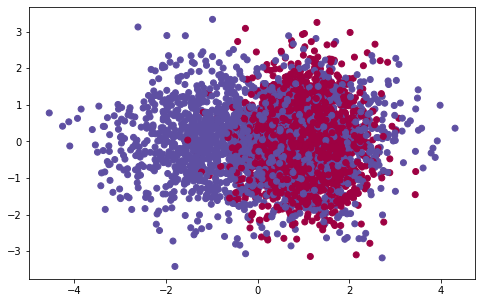

In [ ]:
# visualize data 
plt.subplots(figsize=(8, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.show()

# Baseline

In [ ]:
# initalize the model
random_forest = RandomForestClassifier(random_state=25)

# train the model
random_forest.fit(X_train, y_train)

# make predictions
y_hat = random_forest.predict(X_test)
y_hat_train = random_forest.predict(X_train)

# print evaluations
print(f"Train accuracy: {accuracy_score(y_train, y_hat_train)}\n\
Test accuracy: {accuracy_score(y_test, y_hat)}")

Train accuracy: 1.0
Test accuracy: 0.9152


# Comet Optimization

In [ ]:
# setting the spec for bayes algorithm
spec = {"maxCombo": 20,
        "objective": "minimize",
        "metric": "loss",
        "minSampleSize": 500,
        "retryLimit": 20, 
        "retryAssignLimit": 0}

# setting the parameters we are tuning
model_params = {"n_estimators": {
    "type": "integer",
    "scaling_type": "uniform",
    "min": 100,
    "max": 300},
    "criterion": {
        "type": "categorical",
        "values": ["gini", "entropy"]},
    "min_samples_leaf": {
        "type": "discrete",
        "values": [1, 3, 5, 7, 9]}
    }

# defining the configuration dictionary
config_dict = {"algorithm": "bayes",
               "spec": spec, 
               "parameters": model_params,
               "name": "Bayes Optimization", 
               "trials": 1}

# initializing the comet ml optimizer
opt = comet_ml.Optimizer(api_key="yaUBuGWQQel4gQ5TaNCWbYXal",
                         config=config_dict,
                         project_name="testing-hyperparameter-approaches",
                         workspace="kurtispykes")


for experiment in opt.get_experiments():
  # initializing random forest
  # setting the parameters to be optimized with get_parameter 
  random_forest = RandomForestClassifier(
      n_estimators=experiment.get_parameter("n_estimators"),
      criterion=experiment.get_parameter("criterion"),
      min_samples_leaf=experiment.get_parameter("min_samples_leaf"),
      random_state=25
      )
  
  # training the model and making predictions
  random_forest.fit(X_train, y_train)
  y_hat = random_forest.predict(X_test)
  
  # logging the random state and accuracy of each model
  experiment.log_parameter("random_state", 25)
  experiment.log_metric("accuracy", accuracy_score(y_test, y_hat))
  experiment.log_confusion_matrix(y_test, y_hat)
  
  experiment.end()

COMET WARNING: Passing Experiment through Optimizer constructor is deprecated; pass them to Optimizer.get_experiments or Optimizer.next
COMET INFO: COMET_OPTIMIZER_ID=04530e0b5bef4a82b2b68b9dbc2aaedb
COMET INFO: Using optimizer config: {'algorithm': 'bayes', 'configSpaceSize': 'infinite', 'endTime': None, 'id': '04530e0b5bef4a82b2b68b9dbc2aaedb', 'lastUpdateTime': None, 'maxCombo': 20, 'name': 'Bayes Optimization', 'parameters': {'criterion': {'type': 'categorical', 'values': ['gini', 'entropy']}, 'min_samples_leaf': {'type': 'discrete', 'values': [1, 3, 5, 9]}, 'n_estimators': {'max': 300, 'min': 100, 'scalingType': 'uniform', 'scaling_type': 'uniform', 'type': 'integer'}}, 'predictor': None, 'spec': {'gridSize': 10, 'maxCombo': 20, 'metric': 'loss', 'minSampleSize': 100, 'objective': 'minimize', 'retryAssignLimit': 0, 'retryLimit': 20}, 'startTime': 33150003741, 'state': {'mode': None, 'seed': None, 'sequence': [], 'sequence_i': 0, 'sequence_pid': None, 'sequence_retry': 0, 'sequence